In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import numpy as np

In [2]:
dataset = '/content/drive/MyDrive/Project II (Sem VII)/Liver Patient Dataset (LPD)_train.csv'

In [3]:
df = pd.read_csv(dataset, encoding='ISO-8859-1')

In [4]:
df

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

<ipython-input-6-a26c3fa18c70>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[class_labels[i] for i in class_counts.index], y=class_counts.values, palette='viridis')


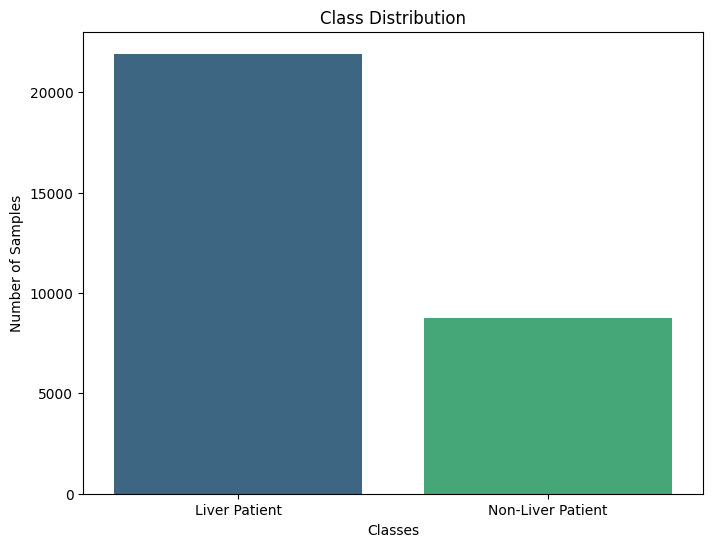

In [6]:
class_column = "Result"


class_counts = df[class_column].value_counts()
class_labels = {1: 'Liver Patient', 2: 'Non-Liver Patient'}

plt.figure(figsize=(8,6))
sns.barplot(x=[class_labels[i] for i in class_counts.index], y=class_counts.values, palette='viridis')


plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

In [7]:
df = df.drop('Gender of the patient', axis=1)

In [8]:
df = df.dropna(subset=['Age of the patient'])

In [9]:
df.rename(columns={
    'Age of the patient': 'Age',
    'Total Bilirubin': 'Bilirubin_Total',
    'Direct Bilirubin': 'Bilirubin_Direct',
    ' Alkphos Alkaline Phosphotase': 'Alkaline_Phosphatase',
    ' Sgpt Alamine Aminotransferase': 'SGPT',
    'Sgot Aspartate Aminotransferase': 'SGOT',
    'Total Protiens': 'Proteins_Total',
    ' ALB Albumin': 'Albumin',
    'A/G Ratio Albumin and Globulin Ratio': 'Albumin_Globulin_Ratio'
}, inplace=True)

In [10]:
df

,Age,Bilirubin_Total,Bilirubin_Direct,Alkaline_Phosphatase,SGPT,SGOT,Proteins_Total,Albumin,Albumin_Globulin_Ratio,Result
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...
30686,50.0,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


In [11]:
df['Bilirubin_Total'].fillna(df['Bilirubin_Total'].median(), inplace=True)
df['Bilirubin_Direct'].fillna(df['Bilirubin_Direct'].median(), inplace=True)
df['Alkaline_Phosphatase'].fillna(df['Alkaline_Phosphatase'].median(), inplace=True)
df['SGPT'].fillna(df['SGPT'].median(), inplace=True)
df['SGOT'].fillna(df['SGOT'].median(), inplace=True)
df['Proteins_Total'].fillna(df['Proteins_Total'].median(), inplace=True)
df['Albumin'].fillna(df['Albumin'].median(), inplace=True)
df['Albumin_Globulin_Ratio'].fillna(df['Albumin_Globulin_Ratio'].median(), inplace=True)

print(df.isnull().sum())


Age                       0
Bilirubin_Total           0
Bilirubin_Direct          0
Alkaline_Phosphatase      0
SGPT                      0
SGOT                      0
Proteins_Total            0
Albumin                   0
Albumin_Globulin_Ratio    0
Result                    0
dtype: int64


<ipython-input-11-159585f21040>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bilirubin_Direct'].fillna(df['Bilirubin_Direct'].median(), inplace=True)
<ipython-input-11-159585f21040>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [12]:
result_mapping = { 1 : 0, 2:1}

In [13]:
df['Result'] = df['Result'].map(result_mapping)

In [14]:
X = df.drop('Result', axis=1)
y = df['Result']

In [15]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [16]:
X_resampled

,Age,Bilirubin_Total,Bilirubin_Direct,Alkaline_Phosphatase,SGPT,SGOT,Proteins_Total,Albumin,Albumin_Globulin_Ratio
0,65.000000,0.700000,0.1,187.0,16.000000,18.000000,6.800000,3.300000,0.900000
1,62.000000,10.900000,5.5,699.0,64.000000,100.000000,7.500000,3.200000,0.740000
2,62.000000,7.300000,4.1,490.0,60.000000,68.000000,7.000000,3.300000,0.890000
3,58.000000,1.000000,0.4,182.0,14.000000,20.000000,6.800000,3.400000,1.000000
4,72.000000,3.900000,2.0,195.0,27.000000,59.000000,7.300000,2.400000,0.400000
...,...,...,...,...,...,...,...,...,...
43825,42.000000,0.900000,0.2,175.0,24.000000,54.000000,5.500000,2.700000,0.900000
43826,38.000000,0.600000,0.1,270.0,23.000000,42.000000,5.100000,2.000000,0.500000
43827,67.353678,0.745123,0.2,209.0,18.451226,25.743869,5.935368,2.770736,0.876343
43828,44.136940,1.000000,0.3,216.0,21.000000,24.000000,7.300000,3.705494,1.500000


In [17]:
y_resampled

,Result
0,0
1,0
2,0
3,0
4,0
...,...
43825,1
43826,1
43827,1
43828,1


<ipython-input-18-cbc13e92268f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[class_labels[i] for i in class_counts.index], y=class_counts.values, palette='viridis')


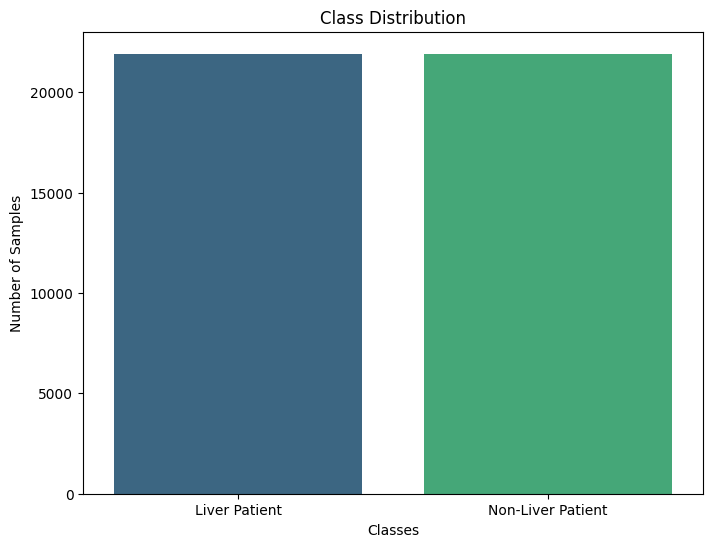

In [18]:
class_column = "Result"


class_counts = y_resampled.value_counts()
class_labels = {0: 'Liver Patient', 1: 'Non-Liver Patient'}

plt.figure(figsize=(8,6))
sns.barplot(x=[class_labels[i] for i in class_counts.index], y=class_counts.values, palette='viridis')

plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [4,7,9],
    'max_depth': [10, 15],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [ 4,7,9],
}-


In [21]:
rf_bal = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_bal, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 9}
Best Cross-Validation Score: 0.9897615788272872


In [22]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


In [23]:
importances = best_rf_model.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

<ipython-input-24-dfac71e97e16>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette='viridis')


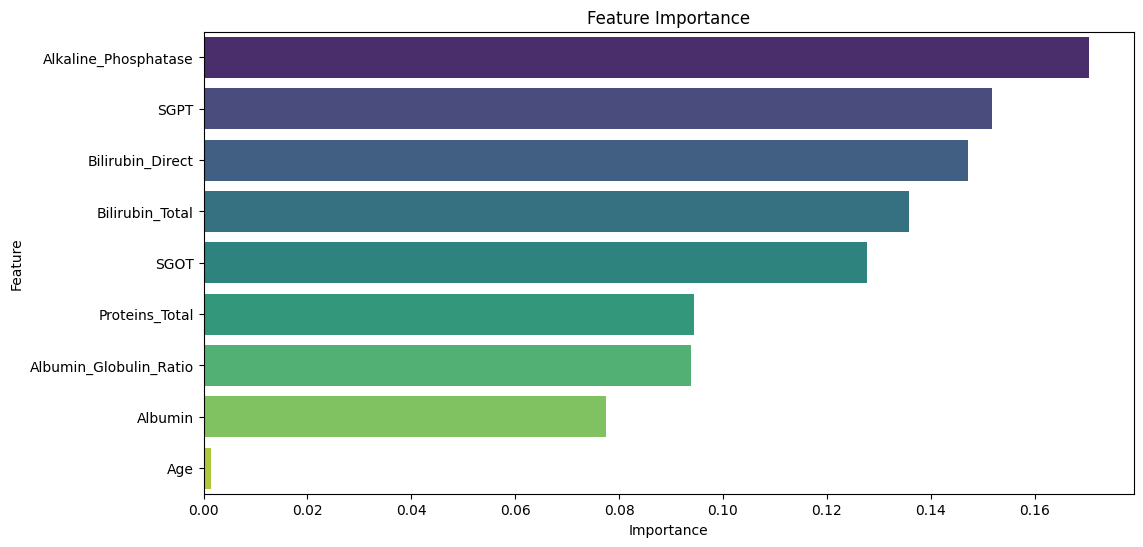

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=features[indices], palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [25]:
cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[4257,  138],
       [  14, 4357]])

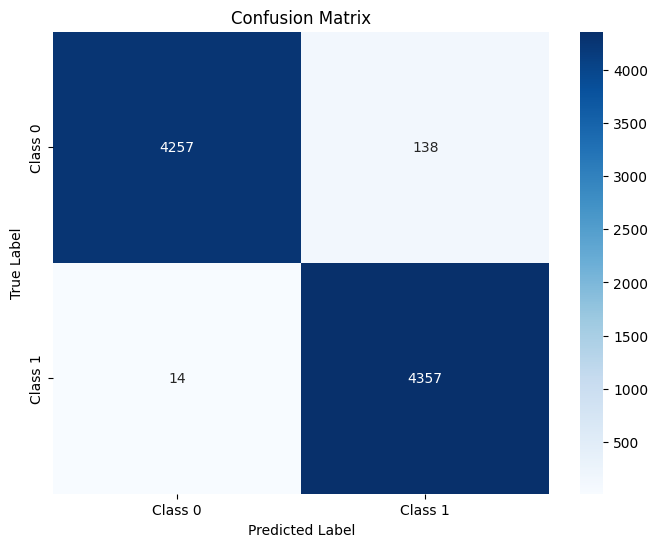

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [27]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      4395
           1       0.97      1.00      0.98      4371

    accuracy                           0.98      8766
   macro avg       0.98      0.98      0.98      8766
weighted avg       0.98      0.98      0.98      8766



In [28]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98
